## Fourierrekker med SymPy

### Kort fortalt

Finn periode $T$ og halvperiode bredde, $\displaystyle L = \frac T 2$ , av funksjonens definisjonsmengde.

Finn funksjonens symmetriegenskaper, det kan være   

(1) Like funksjon, symmetri om y-aksen, $f(x) = f(-x)$ , <i>a</i><sub>0</sub> og <i>a</i><sub>n</sub>  skal beregnes.
      $$a_0 = \displaystyle \frac 2 L \int_{0}^{L} f(x) dx$$   
      $$a_n = \displaystyle \frac 2 L \int_{0}^{L} f(x) \cdot \cos(\frac{n \pi} L x) dx$$   
(2) Odde funksjon, symmetri om origo, $f(x) = - f(-x)$ , <i>b</i><sub>n</sub> skal beregnes.   
      $$b_n = \displaystyle \frac 2 L \int_{0}^{L} f(x) \cdot \sin(\frac{n \pi} L x) dx$$   
(3) Ingen symmetri,						<i>a</i><sub>0</sub> , <i>a</i><sub>n</sub> og <i>b</i><sub>n</sub> skal beregnes.   
      $$a_0 = \displaystyle \frac 1 L \int_{-L}^{L} f(x) dx$$   
      $$a_n = \displaystyle \frac 1 L \int_{-L}^{L} f(x) \cdot \cos(\frac{n \pi} L x) dx$$   
      $$b_n = \displaystyle \frac 1 L \int_{-L}^{L} f(x) \cdot \sin(\frac{n \pi} L x) dx$$   
      
Sett inn for n = 1, 2, 3, 4, ... i uttrykkene for  <i>a</i><sub>0</sub>, <i>a</i><sub>n</sub> og <i>b</i><sub>n</sub> som ble funnet i (1), (2) eller (3) og finn deretter et generelt uttrykk med n som variabel for leddene.

### Eksempel

La oss finne Fourierrekka for 'sagtannfunksjonen'  ![Sagtann](https://dl.dropboxusercontent.com/u/2113110/resources/sagtann3.png) $$f(t) = \frac t 2 - 1\;\;,\;\; -4 < t \le 4\;\;,\;\;f(t + 8) = f(t)$$

Her er L=4 og vi har ingen symmetri, altså full beregning.

In [2]:
from sympy import *
t = symbols('t')
%matplotlib inline

In [3]:
n = symbols('n', integer=True, positive=True)
f = t/2 - 1
L = S('4')

In [4]:
a0 = 1/L*integrate(f, [t, -L, L])
a0

-2

In [5]:
an = 1/L*integrate(f*cos(n*pi/L*t), [t, -L, L])
an

0

Kommentar: Fourierrekka består altså av bare middelverdi og sinusledd. Dette kunne vi ha sett ved at grafen viser en odde funksjon hvis vi ser bort fra middelverdien på -1

In [6]:
bn = 1/L*integrate(f*sin(n*pi/L*t), [t, -L, L])
bn

-4*(-1)**n/(pi*n)

Kommentar: Fordi n ble forutsatt å være heltall blir resultatet forenklet. Prøv også med n som vanlig symbolsk variabel, n = symbols('n')

SymPy har laget et enkelt uttrykk for bn, la oss vise det med LaTeX:

In [15]:
bnx = latex(bn)
bnx

'- \\frac{4 \\left(-1\\right)^{n}}{\\pi n}'

Setter vi dette inn i markdown blir det $$b_n = -\frac{4\, {\left(- 1\right)}^n}{n\, \pi}$$

Vi har nå det vi trenger for å sette opp fourierrekka, $$F = \frac {a_0} {2} + \sum_{n=1}^{\infty} a_n \cdot \cos(\frac{n \pi t}L) + \sum_{n=1}^{\infty} b_n \cdot \sin(\frac{n \pi t}L)$$

$$F = -1 + \frac 4 {\pi} \sum_{n=1}^{\infty}(-1)^{n-1}\frac 1 n \cdot \sin(\frac{n \pi}L t)$$

Vi kan sjekke om dette ser ut til å være riktig uttrykk for den gitte sagtannfunksjonen ved å plotte grafen til for eksempel de 7 første leddene i rekka. Lager en symbolsk summering for n=1..7,

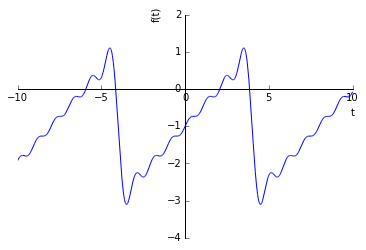

In [8]:
F7 = a0/2 + summation(an*cos(n*pi/L*t) + bn*sin(n*pi/L*t), [n, 1, 7])
plot(F7)